<a href="https://colab.research.google.com/github/Sabiha793/Webacy-Extern-Data-Analytics-Project/blob/main/Extern_Clustering_Analysis_of_Smart_Contract_Risk_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Analysis of Smart Contracts



### Step 1: Import libraries

In [ ]:
# Import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

print("Libraries imported successfully!")


Libraries imported successfully!


### Step 2: Download the dataset

In [ ]:
!gdown 1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n

Downloading...
From: https://drive.google.com/uc?id=1NYR65tYzMe4Rwc0kFyTEj2nerJJFRf6n
To: /content/webacy_risk_dataset.xlsx
100% 28.2k/28.2k [00:00<00:00, 62.9MB/s]


In [ ]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dummy dataset.


### Step 3: Load the Data Section

Now even though we have downloaded the dataset, we still need to load it into our Python environment. For this we will utilize the Pandas library.

In [ ]:
# Loading the dataset

data = pd.read_excel('compiled_risk_data.xlsx')

# Display the first five rows of the dataframe
data.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
data.columns

Index(['Blog Post Link', 'Smart Contract Address', 'Audit Website',
       'Source link 1', 'Source link 2', 'Source link 3', 'Chain',
       'Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')

## Feature Selection
Feature selection is crucial in any machine learning task. For clustering smart contracts, we select features that represent different risk tags effectively. This might include features like transaction frequency, error rates, or specific security vulnerabilities.

Below, we select a hypothetical set of features. For simplicity and effective visualization, we will select just three binary risk tags. Adjust the features according to your dataset and analysis needs.



In [ ]:
data_new = data.copy()
# Assuming the dataset has multiple features, we select a few relevant ones
feature_1 = 'buy_tax'
feature_2 = 'sell_tax'
feature_3 = 'exploitation'
selected_features = data_new[[feature_1, feature_2,feature_3]].replace({True:1, False:0})
print("Features selected for clustering:")

print(selected_features.head())


Features selected for clustering:
   buy_tax  sell_tax  exploitation
0        0         0             1
1        1         0             0
2        0         0             1
3        0         1             1
4        0         0             1


Feel free to use as many features as you would like. We are using only three features here because that is easy to visualize. Otherwise, feel free to utilize features that make sense.

# Applying Clustering
## Hierarchical Clustering with Jaccard Distance

In this section of our Colab notebook, we will apply hierarchical clustering to our dataset using Jaccard distance. This method is particularly effective for datasets with binary attributes, like ours, as it measures the dissimilarity between sample sets.


### Compute Jaccard Distance

Compute the pairwise Jaccard distance between observations. Jaccard distance is a measure of how dissimilar two sets are, ranging from 0 (identical) to 1 (no common elements).


In [ ]:
from scipy.spatial.distance import pdist, squareform

# Assuming 'selected_features' is your DataFrame with binary data
distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)  # Convert to square matrix


### Perform Hierarchical Clustering

Using the complete linkage method, we perform hierarchical clustering. Complete linkage considers the maximum distance between observations in two clusters.

In [ ]:
import scipy.cluster.hierarchy as sch

# Create linkage matrix
linkage_matrix = sch.linkage(distance_matrix, method='ward')



### Plot the Dendrogram

Visualize the clustering as a dendrogram, which will help us understand the data's hierarchical structure.

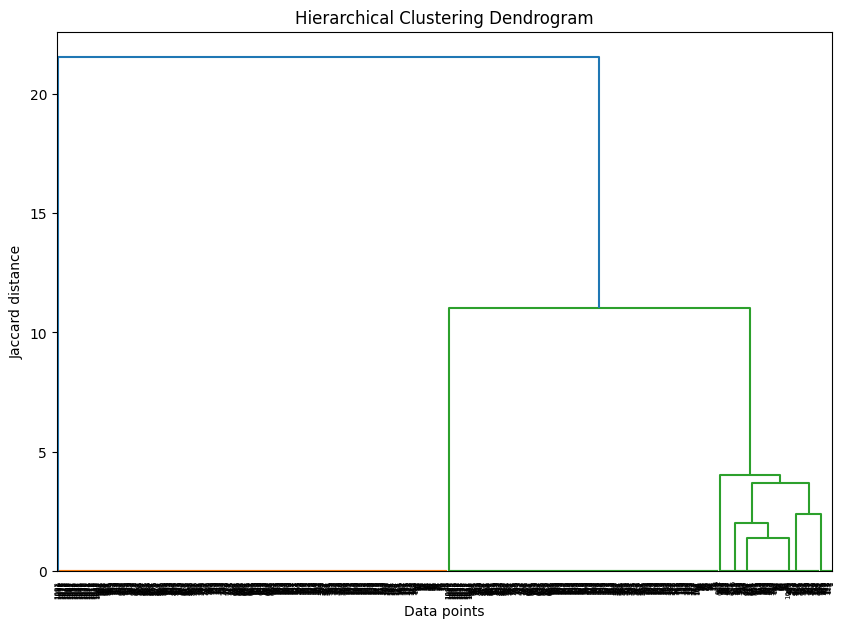

In [ ]:
# Plot the dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()


### Analyzing the Dendrogram

The dendrogram shows how each cluster is linked, with the y-axis representing the distance (dissimilarity) at which clusters are merged. The height of the merge point indicates the similarity between clusters: lower heights suggest greater similarity.

## Visualizing Clusters
Let's visualize the clusters formed based on the selected binary risk tags.


In [ ]:
# Example: Set maximum distance at 1.5 for cluster formation
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')

# Add cluster labels back to your original DataFrame
data_new['cluster'] = cluster_labels

# Summary statistics for each cluster
cluster_summary = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary


buy_tax                        sell_tax                         \
           mean       std median count     mean       std median count   
cluster                                                                  
1           0.0  0.000000    0.0   551   0.0000  0.000000    0.0   551   
2           0.0  0.000000    0.0   382   0.0000  0.000000    0.0   382   
3           0.8  0.401256    1.0   160   0.7875  0.410361    1.0   160   

        exploitation                         
                mean       std median count  
cluster                                      
1             0.0000  0.000000    0.0   551  
2             1.0000  0.000000    1.0   382  
3             0.5375  0.500157    1.0   160

Plot histogram of cluster labels to see distribution of cluster sizes

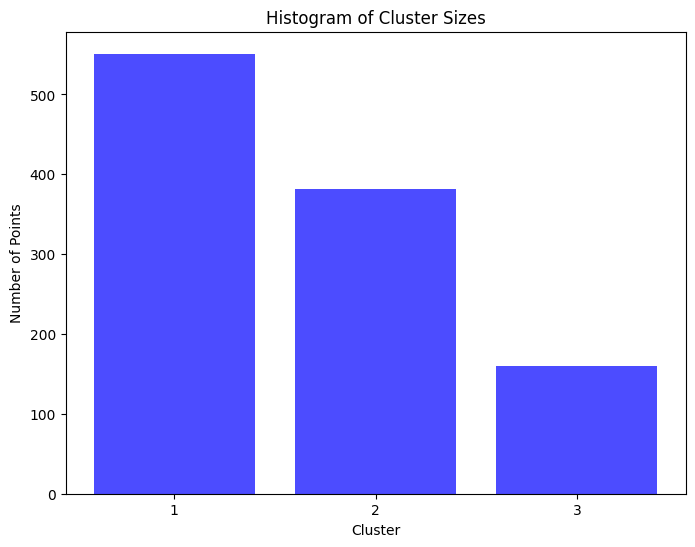

In [ ]:
# Plot histogram of cluster labels to see distribution of cluster sizes
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

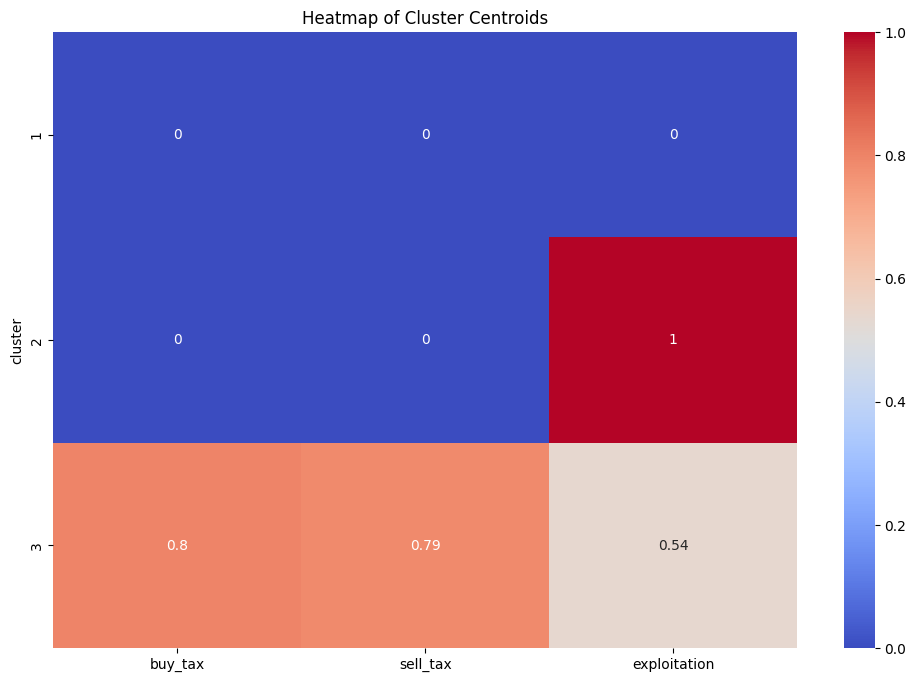

In [ ]:
# Calculate the mean for each cluster and feature
cluster_centers = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()


## Summary of Insights

In this notebook, you have learned how to apply hierarchical clustering to a dataset with binary features using Jaccard distance. By analyzing the dendrogram and the histogram of clusters, you can gain valuable insights into the natural groupings within the dataset and how entities are related based on their attributes.

These visualizations help us identify meaningful clusters and understand the structure of our data at a deeper level. Moving forward, you can use this knowledge to refine your analysis, explore different thresholds for clustering, or apply these techniques to new datasets.